# Importing Libraries 

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# Building an Image Classifier


In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

## Label -   Description

0     -   T-shirt/top

1     -   Trouser

2     -   Pullover

3     -   Dress

4     -   Coat

5     -   Sandal

6     -   Shirt

7     -   Sneaker

8     -   Bag

9     -   Ankle boot


In [5]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [6]:
class_names[y_train_full[10]]

'T-shirt/top'

In [7]:
X_train_full[10]     #28 x 28 pixel values are given 

array([[  0,   0,   0,   0,   0,   0,   0,  11, 142, 200, 106,   0,   0,
          0,   0,   0,   0,   0,  85, 185, 112,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 152, 214, 217, 194, 236, 216, 187,
        149, 135, 153, 211, 217, 231, 205, 217, 188,  34,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  66, 185, 166, 180, 181, 190, 211, 221,
        197, 146, 198, 206, 191, 168, 190, 172, 188, 175,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 135, 153, 160, 175, 180, 170, 186, 187,
        190, 188, 190, 187, 174, 195, 185, 174, 161, 175,  59,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 161, 147, 160, 170, 178, 177, 180, 168,
        173, 174, 171, 185, 184, 185, 172, 171, 164, 174, 120,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2, 175, 146, 145, 168, 178, 181, 185, 180,
        184, 178, 179, 187, 191, 193, 190, 181, 171, 172, 158,   0,   0,
          0,   0],
       [  

In [8]:
# for gradient disent we have to normalize our pixel densities into 0 and 1 

### Data normalization
We then normalize the data dimensions so that they are of approximately the same scale.

In [9]:
X_train_n = X_train_full / 255.    # 255 stands for completely white pixel 
X_test_n = X_test / 255.

In [10]:
# in general ml problems we generally subtract mean from the number and then divide it by standard deviation

# Split the data into train/validation/test datasets


In [11]:
X_valid, X_train = X_train_n[:5000], X_train_n[5000:]           # used for training the model
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]     # used for tuning the hyperparameters and evaluate the models
X_test = X_test_n                                               # used to test the model 

In [12]:
X_valid[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

# Create the model architecture
There are two APIs for defining a model in Keras:
* Sequential model API
* Functional API

In [13]:
# for simple neural network use sequential model API and for complex network use functional api 

In [14]:
np.random.seed(42)           #it is used to replicate the same result every time 
tf.random.set_seed(42)

![](Structure.jpg "Title")

In [15]:
model = keras.models.Sequential()

model.add(keras.layers.Flatten(input_shape=[28, 28]))     # to convert 28*28 pixels into sinple array hence flatten
model.add(keras.layers.Dense(300, activation="relu"))     # 300 is for hidden layers 1 
model.add(keras.layers.Dense(100, activation="relu"))     # 100 is for hidden layer 2
#relu is 0 for all negative no and equal to number for all positive nos 

model.add(keras.layers.Dense(10, activation="softmax"))   # 10 categories we want in output 
# softmax equates the sum of all the class probabilies to 1 

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [17]:
# none is the batch size of data 
# params means no of parameters 
# 235500 = 300*784+300 bias variable 

We can access the parameters using get_weight() method

In [26]:
weights, biases = model.layers[1].get_weights()         # to get info about weights and bias 

In [27]:
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [28]:
weights.shape

(784, 300)

In [29]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [30]:
biases.shape

(300,)

## Model Compiling

In [32]:
model.compile(loss="sparse_categorical_crossentropy",  #because y is in lable, probability per class then categorical crossentropy
                                                       #binary cross entropy if we have binary class
              optimizer="sgd",                         #stocastic gradient desent
              metrics=["accuracy"])

In [55]:
model_history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2207 - accuracy: 0.9201 - val_loss: 0.2893 - val_accuracy: 0.8942
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2174 - accuracy: 0.9221 - val_loss: 0.2906 - val_accuracy: 0.8968
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2139 - accuracy: 0.9227 - val_loss: 0.3970 - val_accuracy: 0.8568
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2106 - accuracy: 0.9247 - val_loss: 0.2921 - val_accuracy: 0.8966
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2086 - accuracy: 0.9242 - val_loss: 0.2812 - val_accuracy: 0.8990
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2030 - accuracy: 0.9274 - val_loss: 0.3002 - val_accuracy: 0.8914
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2005 - accuracy: 0.9289 - val_loss: 0.2933 - val_accuracy:

In [56]:
model_history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [57]:
model_history.history
# it will give all accuracy , loss in the form of dict

{'loss': [0.22067540884017944,
  0.21739493310451508,
  0.2138780653476715,
  0.21064762771129608,
  0.20858125388622284,
  0.20302796363830566,
  0.20048022270202637,
  0.19769273698329926,
  0.194059818983078,
  0.1910882443189621,
  0.18908406794071198,
  0.1845230758190155,
  0.1817043125629425,
  0.17943774163722992,
  0.1764659285545349,
  0.1737305223941803,
  0.17128750681877136,
  0.16860206425189972,
  0.1658872812986374,
  0.16296541690826416,
  0.16003456711769104,
  0.15774831175804138,
  0.15569958090782166,
  0.15283876657485962,
  0.15017029643058777,
  0.14825479686260223,
  0.1461256593465805,
  0.1437179446220398,
  0.14120256900787354,
  0.1385047882795334],
 'accuracy': [0.92005455493927,
  0.92207270860672,
  0.9226727485656738,
  0.9247272610664368,
  0.9242181777954102,
  0.9273999929428101,
  0.9288908839225769,
  0.9295272827148438,
  0.9302181601524353,
  0.9318000078201294,
  0.9314363598823547,
  0.9337090849876404,
  0.9355999827384949,
  0.935763657093048

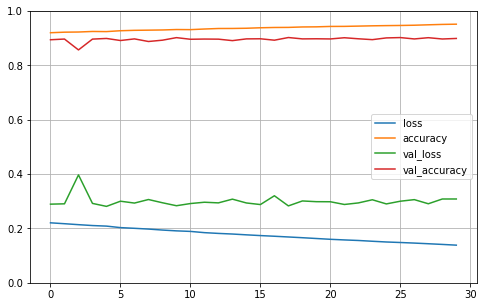

In [58]:
import pandas as pd

pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# Evaluating model

In [59]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 998us/step - loss: 0.3468 - accuracy: 0.8892


[0.34677785634994507, 0.88919997215271]

In [60]:
# 2nd value is accuracy 

## Accuracy is 88.91%

In [61]:
X_new = X_test[:3]

In [62]:
y_proba = model.predict(X_new)
y_proba.round(2)                  # round off the probability value to 2 decimal digits 

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.98, 0.  , 0.02, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

AxesImage(54,36;334.8x217.44)


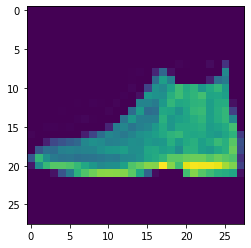

In [63]:
print(plt.imshow(X_test[0]))

AxesImage(54,36;334.8x217.44)


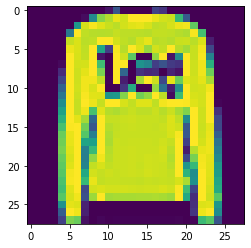

In [64]:
print(plt.imshow(X_test[1]))

AxesImage(54,36;334.8x217.44)


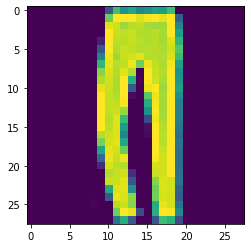

In [65]:
print(plt.imshow(X_test[2]))